## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [6]:
df = pd.read_csv(r"C:\Users\DELL\Documents\dataset\CC_GENERAL.csv")

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
df = df.fillna(0)

In [12]:
df.drop(["CUST_ID"], axis=1)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df = pd.get_dummies(df)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [22]:
from sklearn.cluster import KMeans


In [24]:
model = KMeans(n_clusters=2)

In [26]:
cluster_labels = model.fit_predict(scaled_df)

In [28]:
len(scaled_df)
df['Cluster'] = cluster_labels

In [30]:
from sklearn.metrics import silhouette_score
ssd = []
sil_score = []
for k in range(2,15,1):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    cluster_labels = model.fit_predict(scaled_df)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)
    sil_score.append(silhouette_score(scaled_df, cluster_labels))

Text(0, 0.5, ' Sum of Squared Distances')

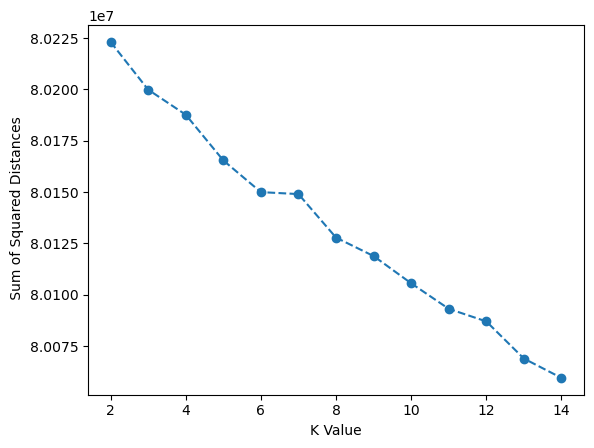

In [32]:
plt.plot(range(2,15,1),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Choose the optimal K and calculate the silhouette score for the best model.

Text(0, 0.5, ' Score')

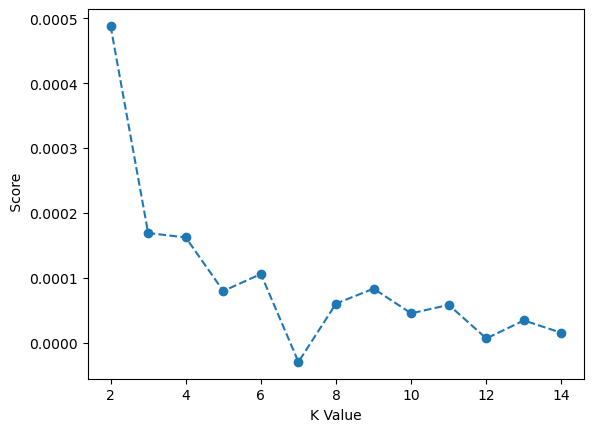

In [35]:
plt.plot(range(2,15,1),sil_score,'o--')
plt.xlabel("K Value")
plt.ylabel(" Score")

## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [41]:
s = []
linkage_list = ["average", "single"]
metric_list = ["euclidean", "manhattan", "cosine"]
n = np.arange(2, 3)
best = -1
best_affinity = " "
best_n = 1
best_linkage = " "

In [ ]:
for n_clusters in n:
    for metric in metric_list:
        for linkage in linkage_list:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            model = model.fit(df)
            silhouette = silhouette_score(df, model.labels_)
            s.append(silhouette)

            if silhouette >= best:
                best_n = n_clusters
                best = silhouette
                best_affinity = metric  # Fix: Use metric instead of affinity
                best_linkage = linkage


In [45]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage = "average")

In [47]:
cluster_labels = model.fit_predict(df)

In [49]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
silhouette_score(df, cluster_labels)

0.8860611465201891

In [55]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage = "complete")
cluster_labels = model.fit_predict(df)

In [57]:
silhouette_score(df, cluster_labels)

0.8148728089346863

Choose the optimal K and calculate the silhouette score for the best model.

## DBSCAN

Find the optimal DBSCAN model.

In [61]:
from sklearn.cluster import DBSCAN

In [80]:
from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(scaled_df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Find the parameters that optimize the performance of your model and calculate the silhouette score.

Text(0.5, 0, 'Epsilon Value')

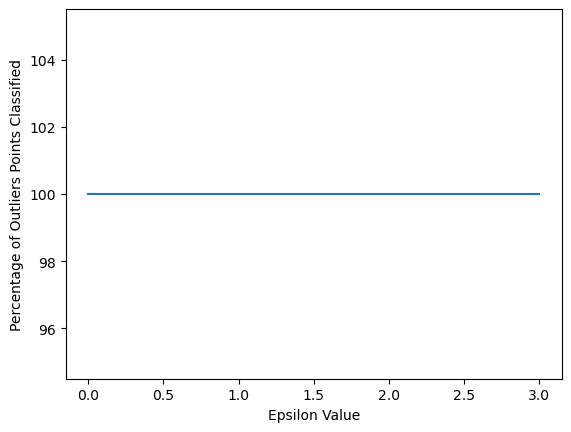

In [85]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Outliers Points Classified")
plt.xlabel("Epsilon Value")

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?